<a href="https://colab.research.google.com/github/abhi-11nav/Churn-Model/blob/main/Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries for data visualization and manipulation

import pandas as pd
import numpy as np 

#### Source of the data 
https://www.kaggle.com/datasets/shubh0799/churn-modelling

In [3]:
# Mentioning the path of the dataset 

raw_dataset_link = "https://raw.githubusercontent.com/abhi-11nav/Churn-Model/main/Churn_Modelling.csv.xls"

In [4]:
# Importing the dataset and assigning it to a variable. 

dataset = pd.read_csv(raw_dataset_link)

In [5]:
# printing the head of the dataset 

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Checking for features in data consisting of all unique values and deleting them 


col_list = []


for cols in dataset.columns:
  if len(dataset[cols].unique()) == dataset.shape[0]:
    col_list.append(cols)

if len(col_list)>0:
  print(col_list,"consists of all unique values. Hence, eliminate them\n")
  dataset.drop(col_list,axis=1,inplace=True)
  print("Features with unique values deleted :-)")

['RowNumber', 'CustomerId'] consists of all unique values. Hence, eliminate them

Features with unique values deleted :-)


In [7]:
# Printing the head of the dataset 

dataset.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# I dont think that the feature "Surname" adds any value to the output. So we might as well get rid of that too

dataset.drop("Surname",axis=1,inplace=True)

In [9]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Now let us look at the shape of dataset

dataset.shape

(10000, 11)

We have got 10000 examples with 11 features to work with and build a model

In [11]:
# Differnetiating the categorical and numerical features in the dataset and storing them in a list 

category_feat = []
numerical_feat = []

for cols in dataset.columns:
  if type(dataset[cols][0]) == str:
    category_feat.append(cols)
  else:
    numerical_feat.append(cols)


print("There are ",len(category_feat)," categorical features and ",len(numerical_feat)," numerical features in the dataset.")

There are  2  categorical features and  9  numerical features in the dataset.


In [12]:
# Now let us print out some descriptive features about the dataset and also info about the types of data in the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


We have 3 float, 6 integer adn 2 string type data

In [13]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
# Let us check for missing values in the dataset

dataset.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Good News ! There aren't any missing values. 

In [15]:
# Importing visualization Libraries

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

We cannot see any linear or obvious relation between these two features 

In [16]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Now let us encode the categorical features

# Printing out the number of categories 
for cols in category_feat:
  print(dataset[cols].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


We have two categories in gender and three in geogrpahy. So we will use frequency encoding for the geography feature and 1&0 (binary encoding) for gender value. 

In [18]:
# Frequency encoding for Geogrpahy 

dataset["Geography"] = dataset["Geography"].map(dataset["Geography"].value_counts().to_dict()) 

gender_mapping = {"Male":1,"Female":0}
dataset["Gender"] = dataset["Gender"].map(gender_mapping)

In [19]:
# Now we have encoded the categorical data 

dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,5014,0,42,2,0.00,1,1,1,101348.88,1
1,608,2477,0,41,1,83807.86,1,0,1,112542.58,0
2,502,5014,0,42,8,159660.80,3,1,0,113931.57,1
3,699,5014,0,39,1,0.00,2,0,0,93826.63,0
4,850,2477,0,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# Splitting the dataset into X and y (featureas and label)

X = dataset.drop(["Exited"],axis=1)
y = dataset["Exited"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


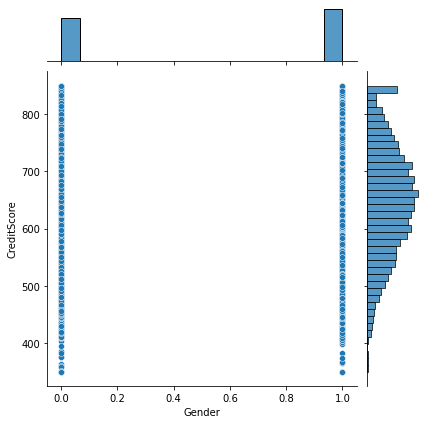

In [21]:
sns.jointplot(dataset["Gender"],dataset["CreditScore"])

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [24]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.997164,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,-1.015539,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.997164,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.997164,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,-1.015539,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [28]:
# Splitting the data into training data, validation data and testing data

from sklearn.model_selection import train_test_split 

train_X, test_X, train_Y, test_Y = train_test_split(X,y,test_size=0.20)
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X,train_Y, test_size = 0.25)

In [30]:
# Importing the necessary libraries required for builidng an ANN model 

import tensorflow as tf

from tensorflow import keras 

from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model, Sequential 

In [65]:
# Builiding the model 

model = keras.models.Sequential([
    keras.layers.Dense(X.shape[1]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [66]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [67]:
history = model.fit(train_X, train_Y, epochs=10, validation_data=([valid_X,valid_Y]))

Epoch 1/10
188/188 [==============================] - 9s 39ms/step - loss: 0.4057 - accuracy: 0.8292 - val_loss: 0.3780 - val_accuracy: 0.8455
Epoch 2/10
188/188 [==============================] - 5s 26ms/step - loss: 0.3645 - accuracy: 0.8488 - val_loss: 0.3645 - val_accuracy: 0.8485
Epoch 3/10
188/188 [==============================] - 6s 31ms/step - loss: 0.3494 - accuracy: 0.8533 - val_loss: 0.3695 - val_accuracy: 0.8495
Epoch 4/10
188/188 [==============================] - 5s 28ms/step - loss: 0.3465 - accuracy: 0.8590 - val_loss: 0.3666 - val_accuracy: 0.8435
Epoch 5/10
188/188 [==============================] - 5s 28ms/step - loss: 0.3400 - accuracy: 0.8600 - val_loss: 0.3570 - val_accuracy: 0.8580
Epoch 6/10
188/188 [==============================] - 6s 30ms/step - loss: 0.3385 - accuracy: 0.8632 - val_loss: 0.3590 - val_accuracy: 0.8520
Epoch 7/10
188/188 [==============================] - 5s 28ms/step - loss: 0.3314 - accuracy: 0.8577 - val_loss: 0.3658 - val_accuracy: 0.8535

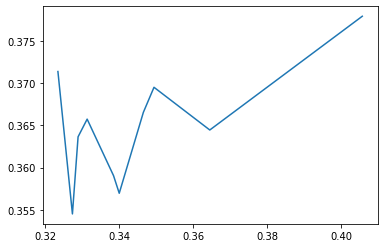

In [68]:
# Plotting the accuracies and losses for valdiation and training data

plt.plot(history.history["loss"],history.history["val_loss"])

<function matplotlib.pyplot.title>

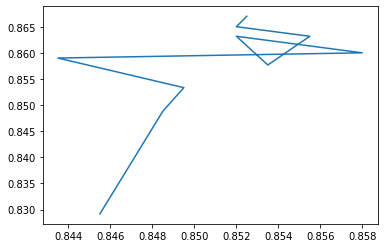

In [71]:
plt.plot(history.history["val_accuracy"],history.history["accuracy"])
plt.title

In [76]:
import pickle 

In [78]:
file = open("model.pkl","wb")

pickle.dump(model,file)

INFO:tensorflow:Assets written to: ram://22eef622-75e1-4d78-914e-458946484fa7/assets
